<p align = "center">
<img src = '../docs/logo.png' height = "250">
</p>

# Trabalho - Conversão Eletromecânica


**Alunos:**
- André Vitor Cadena de Oliveira
- Fábio Augusto Almeida Marçal
- Gabriel Nazário Gonçalves
- Lorenzo Carrera de Oliveira
- Mateus Pincho de Oliveira

---

# Exercício 02

Considere o circuito magnético a seguir: 

<p align = "center">
<img src = '../docs/circuito_bobina.png' height = "350">
</p>

---

In [28]:
# Importando módulos...
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sp
from scipy.misc import derivative
from scipy.interpolate import CubicSpline

# Lidando com os warnings dos plots
import warnings
warnings.filterwarnings('ignore')

## Importando dados da questão
---

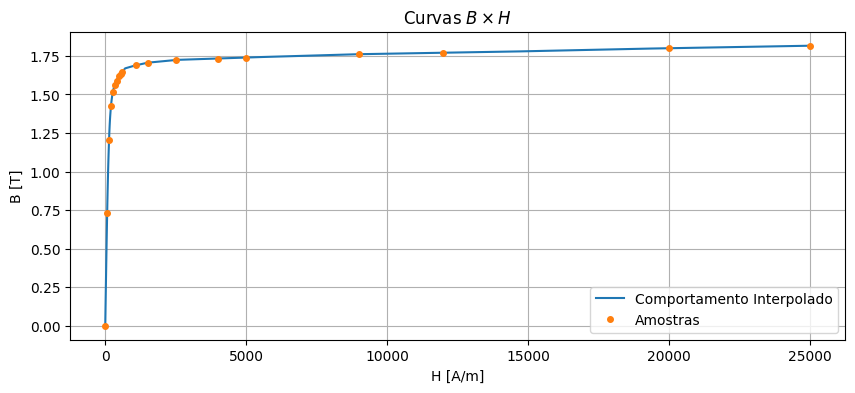

In [29]:
g = 2 * 0.45e-3    # Comprimento do entreferro
r = 6.3e-2         # Raio do rotor
D = 8e-2           # Comprimento do sistema
N = 90             # Número de espiras
l_c = 75e-2        # Caminho do Ferro
u0 = np.pi * 4e-7  # Permissividade magnética do ar

# Pontos fornecidos na tabela da página
H_amostra = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])  # Valores de H
B_amostra = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.8, 1.816])  # Valores de B

# Interpolação dados
H__B_real = CubicSpline(B_amostra, H_amostra, bc_type='natural')

# Idealmente, uma densidade de fluxo gera um campo magnético nulo no condutor, visto que u_c é idealmente infinito 
def H__B_ideal(B): return np.zeros_like(B) 

# Valores de H para os quais queremos interpolar B
n_amostras = 100
B = np.linspace(0, np.max(B_amostra), n_amostras)

# Gráfico BxH
plt.figure(figsize=(10,4))
plt.title(r'Curvas $B\times H$')
plt.xlabel('H [A/m]')
plt.ylabel('B [T]')
plt.grid(True)

# Plotando dados
plt.plot(H__B_real(B), B, '-', label='Comportamento Interpolado')
plt.plot(H_amostra, B_amostra, marker='o', linestyle='None', ms=4, label='Amostras')

plt.legend(loc='best')

## Observações: 

1. Considere que exista um sensor de posição, de modo que a posição do rotor é sempre conhecida pelo sistema que controla a corrente dos enrolamentos;

2. Considere que a velocidade com a qual o sistema opera é suficientemente lenta de modo que o tempo necessário para a corrente sair de 0 até seu valor máximo pode ser desprezado;

3. Considere que o controlador deverá aplicada corrente em apenas uma bobina de cada vez.

---


## Item 01

Apresente um gráfico do fluxo concatenado na Bobina 1 em função da corrente aplicada nessa bobina considerando a posição do rotor variando da posição $-30°$ até $+30°$. Utilize um passo de $10°$ entre as curvas, de modo que, seu gráfico terá um total de 6 curvas.

---

In [30]:
# Posição do rotor variando de -30° a 30° com um passo de 10°
theta_d = np.array([-29.9, -20, -10, 0, 10, 20, 29.9])
theta_r = np.radians(theta_d)

# Área do ferro não depende de theta
A_c = D * r * np.radians(30) 

# Área do ar varia conforme a posição
A_g = np.array([(D * r * (np.radians(30) - np.abs(th_r))) for th_r in theta_r])

# Inicializando arrays vazios
B_ar    = np.array([B * A_c / _A_g for _A_g in A_g])
lamb_c  = np.array([N * _A_g * _B_ar for (_B_ar, _A_g) in zip(B_ar, A_g)])
I_real  = np.array([(H__B_real(B) * l_c + _B_ar * g / u0) / N for _B_ar in B_ar])
I_ideal = np.array([(H__B_ideal(B) * l_c + _B_ar * g / u0) / N for _B_ar in B_ar])

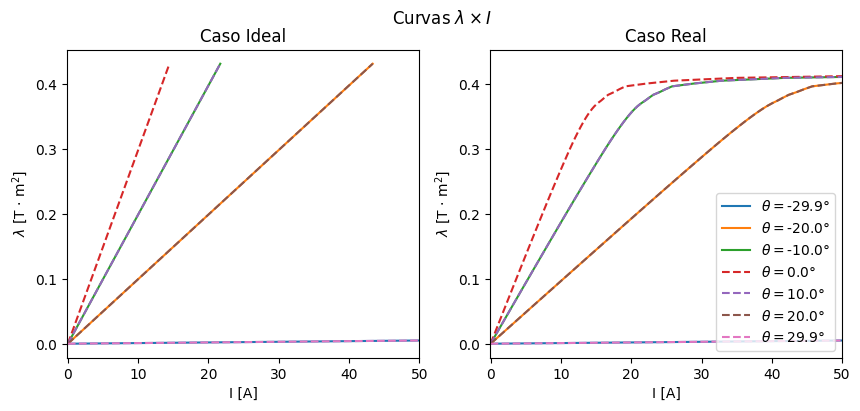

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
# Plotando o gráfico Lambda x I para cada ângulo
for (_I_ideal, _lamb_c, _theta_d) in zip(I_ideal, lamb_c, theta_d):
    plt.plot(_I_ideal, _lamb_c, '-' if _theta_d < 0 else '--', label= r'$\theta = $' + f'{_theta_d:.1f}°')
plt.xlabel('I [A]')
plt.ylabel(r'$\lambda$ [T $\cdot$ m$^2$]')
plt.xlim([-0.1,50])

plt.subplot(1, 2, 2)
# Plotando o gráfico Lambda x I para cada ângulo
for (_I_real, _lamb_c, _theta_d) in zip(I_real, lamb_c, theta_d):
    plt.plot(_I_real, _lamb_c, '-' if _theta_d < 0 else '--', label= r'$\theta = $' + f'{_theta_d:.1f}°')
plt.xlabel('I [A]')
plt.ylabel(r'$\lambda$ [T $\cdot$ m$^2$]')
plt.xlim([-0.1,50])

# Título para a figura como um todo
plt.suptitle(r'Curvas $\lambda\times I$')

# Títulos dos subsplots
plt.subplot(1, 2, 1).set_title(r'Caso Ideal')
plt.subplot(1, 2, 2).set_title(r'Caso Real')

plt.legend(loc='best')

## Item 02

Determine qual deve ser a corrente aplicada na bobina de modo a obter uma densidade de fluxo de $1,8$ T quando o rotor estiver na posição $0°$.

---

In [32]:
# Lei de Ampère na posição de 0°: Área do entreferro = Área do ferro
I_02 = (H__B_real(1.8) * l_c + (1.8 / u0) * g) / N 
print(f'I(1.8) = {I_02 :.2f} A') 

I(1.8) = 180.99 A


## Item 03 e 04

Considerando que a corrente calculada no item anterior é aplicada na bobina 1:

- Apresente um gráfico do Torque produzido pela bobina 1 em função da posição do rotor considerando que o núcleo seja ideal;

- Apresente um gráfico do Torque produzido pela bobina 1 em função da posição do rotor considerando a característica real do núcleo.

---

In [33]:
# Calcula a força do bloco em função da posição x
def T__theta(I_alvo, aprox_H__B, intervalo_theta):
    W = []

    # Vetor de corrente para a integração
    intervalo_I = np.linspace(0, I_alvo, n_amostras)

    A_g = lambda theta:(30 - abs(theta)) * np.pi * r * D / 180  # Área do entreferro

    for t in intervalo_theta:
        B_ar   = B * A_c / A_g(t)
        lamb_c = N * A_c * B
        I      = (aprox_H__B(B) * l_c + B_ar * g / u0) / N

        # Interpolação dos Fluxos Concatenados
        lamb__I  = CubicSpline(I, lamb_c, bc_type='natural')

        # Definindo o vetor fluxo concatenado
        lamb = lamb__I(intervalo_I)

        # Definindo o vetor energia integrando o fluxo
        W.append(sp.integrate.trapezoid(lamb, intervalo_I))
    
    W = np.array(W)

    # Determinando a curva através Interpolação
    W__theta = CubicSpline(intervalo_theta, W, bc_type = "natural")

    # Achando o Torque a partir da derivada da energia
    T = derivative(W__theta, intervalo_theta, dx=np.max(intervalo_theta) / n_amostras)

    # Função de Força x Posição
    T__theta = CubicSpline(intervalo_theta, T, bc_type='natural')

    return T__theta(intervalo_theta), W__theta(intervalo_theta)

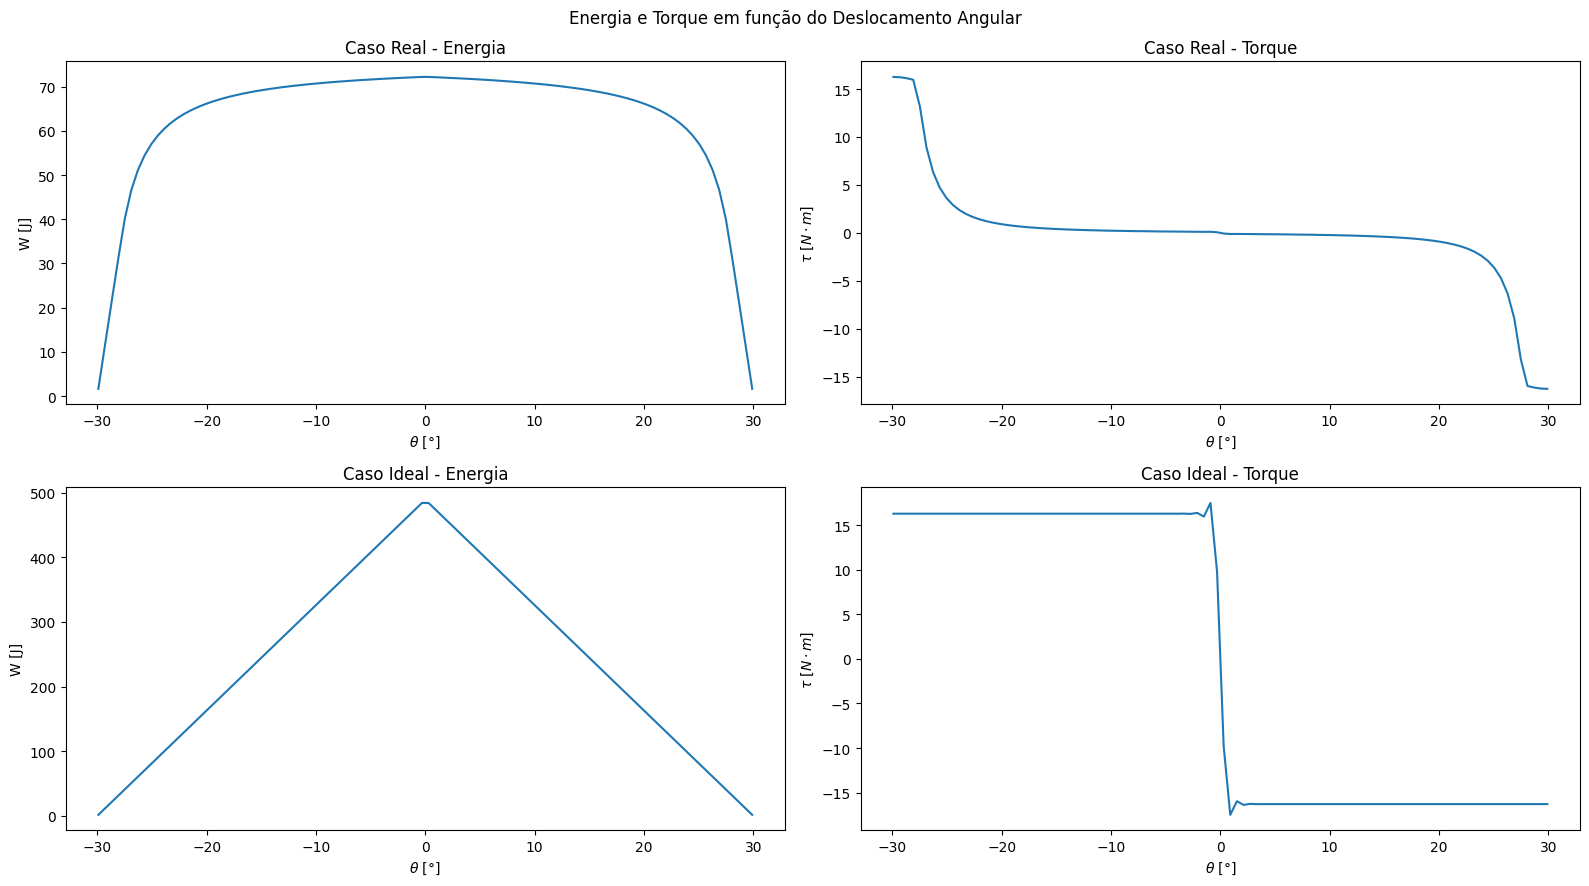

In [34]:
intervalo_theta = np.linspace(np.min(theta_d), np.max(theta_d), n_amostras)
T_ideal, W_ideal = T__theta(I_02, H__B_ideal, intervalo_theta)
T_real, W_real = T__theta(I_02, H__B_real, intervalo_theta)

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(intervalo_theta, W_real)
plt.xlabel(r'$\theta \ [°]$')
plt.ylabel('W [J]')

plt.subplot(2, 2, 2)
plt.plot(intervalo_theta, T_real)
plt.xlabel(r'$\theta \ [°]$')
plt.ylabel(r'$\tau \ [N\cdot m]$')

plt.subplot(2, 2, 3)
plt.plot(intervalo_theta, W_ideal)
plt.xlabel(r'$\theta \ [°]$')
plt.ylabel('W [J]')

plt.subplot(2, 2, 4)
plt.plot(intervalo_theta, T_ideal)
plt.xlabel(r'$\theta \ [°]$')
plt.ylabel(r'$\tau \ [N\cdot m]$')

# Título para a figura como um todo
plt.suptitle('Energia e Torque em função do Deslocamento Angular')

# Títulos dos subsplots
plt.subplot(2, 2, 1).set_title('Caso Real - Energia')
plt.subplot(2, 2, 2).set_title('Caso Real - Torque')
plt.subplot(2, 2, 3).set_title('Caso Ideal - Energia')
plt.subplot(2, 2, 4).set_title('Caso Ideal - Torque')

plt.tight_layout()

## Item 05

Deseja-se que o sistema opere com uma velocidade constante de 100 RPM em sentido anti-horário. Descreva como o controlador deverá aplicar corrente nas bobinas de modo a alcançar essa velocidade.

---


In [35]:
rpm = 100         # Rotações por minuto
rps = rpm / 60    # Rotações por segundo
t = 1 / rps       # O tempo necessário pra uma rotação
ta = t * 30 / 360 # O tempo de acionamento de cada bobina (ativadas a cada 30°)

seq = [3, 2, 1]

print(f'O tempo de acionamento da corrente de cada fase é de: {ta*1e3:.2f} ms')
print(f'Para o rotor girar no sentido anti-horário, o controlador deverá ligar ciclicamente as bobinas na sequência {seq}.')

O tempo de acionamento da corrente de cada fase é de: 50.00 ms
Para o rotor girar no sentido anti-horário, o controlador deverá ligar ciclicamente as bobinas na sequência [3, 2, 1].


In [36]:
%%capture

def R(theta): # Rotação a base de theta
    theta_r = np.radians(theta)
    return np.array([[np.cos(theta_r), -np.sin(theta_r)],
                     [np.sin(theta_r), np.cos(theta_r)]])

# Configurando modelos
rotor = np.array([R(t) @ np.array([[0,  0],
                                   [1, -1]]) for t in np.arange(0, 180, 90)])

bobinas = np.array([R(t) @ np.array([[0,  0],
                                     [2, -2]]) for t in np.arange(0, 180, 60)])

# Posição para legenda para terminais de cada bobina
terminais_legenda = np.array([R(t) @ np.array([0, 2.5]) for t in np.arange(0, 360, 60)])
terminais_legenda[:,0] -= 0.1 # Correção para ajustar a posição no gráfico

intervalo_theta = np.linspace(0, 360, n_amostras)

# Animação das bobinas
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
ax.axis('square')
ax.axis('off')
ax.set(title='Acionamento das Bobinas', xlim=[-3, 3], ylim=[-3, 3])

fluxo_plot = ax.plot(*bobinas[0], color='lightgreen', linestyle = '-', zorder=0)[0]
eixo_A_plot = ax.plot(*rotor[0], color='gray', linestyle = '--', zorder=1)[0]
eixo_B_plot = ax.plot(*rotor[1], color='gray', linestyle = '--', zorder=1)[0]

rotor_scat = ax.scatter(*np.hstack(rotor), color='gray', zorder=2)

ax.scatter(*np.hstack(bobinas), color='darkorange', zorder=2)
bobina_acionada_scat = ax.scatter(*bobinas[0], color='green', zorder=3)

for l, legenda in enumerate([1, -2, 3, -1, 2, -3]):
    ax.text(*terminais_legenda[l], str(legenda))

t_text = ax.text(1.5, -3, r'$t =$ ' + f'{0.0:.2f} ms', fontsize=10)

def update(frame):
    # Para cada frame, atualiza os dados
    theta = intervalo_theta[frame]
    acionada = seq[int(theta//30 % 3)] - 1
    t_atual = t * 1e3 * theta / 360

    # Atualiza timer
    t_text.set_text(r'$t =$ ' + f'{t_atual:.2f} ms')

    # Modifica traços
    _rotor = R(theta) @ np.hstack(rotor)
    _eixo_A, _eixo_B = R(theta) @ rotor[0], R(theta) @ rotor[1]

    # Atualiza os scatters
    bobina_acionada_scat.set_offsets(bobinas[acionada].T)
    rotor_scat.set_offsets(_rotor.T)

    # Atualiza o plot de linha
    fluxo_plot.set_data(*bobinas[acionada])
    eixo_A_plot.set_data(*_eixo_A)
    eixo_B_plot.set_data(*_eixo_B)

    return (rotor_scat, eixo_A_plot, eixo_B_plot, bobina_acionada_scat, fluxo_plot, t_text)

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_amostras, interval=5)
ani.save('../docs/acionamento.gif', writer='pillow')

![acionamento](../docs/acionamento.gif)

## Item 06 e 07

Nessas condições, determine a razão entre a potência mecânica desenvolvida pelo motor e a potência necessária para o sistema de acionamento, para quando: 

- A característica do núcleo é ideal;
- A característica do núcleo é real.

---

In [ ]:
intervalos_theta = np.linspace(-29.9, 0, n_amostras)

Wc_real = []
Wc_ideal = []
corrente_real_array = np.zeros(n_amostras)
corrente_ideal_array = np.zeros(n_amostras)
fluxo_conc_array = np.zeros(n_amostras)
B_ar_array = np.zeros(n_amostras)
B_ferro_array = np.linspace(0, 1.816, n_amostras)

A = lambda theta: (30 - abs(theta)) * np.pi * r * D / 180

H_real = H__B_real(B)

for t in range(len(intervalos_theta)):
  for b in range(len(B_ferro_array)):
    B_ar_array[b] = (B_ferro_array[b] * A_c) / (A(intervalos_theta[t]))
    fluxo_conc_array[b] = ((N * A(intervalos_theta[t])) * (B_ar_array[b]))
    corrente_real_array[b] = (H_real[b] * l_c + B_ar_array[b] * g / u0) / N
    corrente_ideal_array[b] = (B_ar_array[b] * g / u0) / N


  fluxo_interpolado_real  = CubicSpline(corrente_real_array, fluxo_conc_array, bc_type='natural')
  fluxo_interpolado_ideal = CubicSpline(corrente_ideal_array, fluxo_conc_array , bc_type='natural')


  # Vetor de corrente para a integração
  I_intervalo = np.linspace(0,I_02,n_amostras)

  fluxo_conc_real  = fluxo_interpolado_real(I_intervalo)
  fluxo_conc_ideal = fluxo_interpolado_ideal(I_intervalo)


pot_acionamento_ideal = np.max(fluxo_conc_array) * np.max(corrente_ideal_array)
pot_acionamento_real = np.max(fluxo_conc_array) * np.max(corrente_real_array)


Area_energia = sp.integrate.trapezoid(I_intervalo,fluxo_conc_real)        # Energia

# Para o caso ideal há uma aproximacao de 50%, ou seja, a potência mecânica é metade da potencia do controlador.
pot_mecanica_ideal = pot_acionamento_ideal/2
pot_mecanica_real = pot_acionamento_real - Area_energia


razao_ideal = pot_mecanica_ideal/pot_acionamento_ideal
razao_real = (pot_mecanica_real)/(pot_acionamento_real)


print("\n""A razão entre a potência mecânica pelo motor e a potência necessária no caso ideal é: "+ f"{razao_ideal:.3f}")
print("A razão entre a potência mecânica pelo motor e a potência necessária no caso real é: "+ f"{razao_real:.3f}""\n")